In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
sns.set()

In [3]:
df = pd.read_csv('../input/raw/mpg_raw.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64

In [8]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [9]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [10]:
df.nunique(axis=0)

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [11]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [12]:
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [13]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [14]:
df = df[~df.isnull().any(axis=1)]
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)

/home/prakhar/.local/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [16]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(cats)
print(nums)

['origin', 'name']
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']


In [17]:
df.nunique(axis=0)

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
name            301
dtype: int64

In [18]:
cats.extend(['cylinders', 'model_year'])
nums.remove('cylinders')

In [19]:
nums.remove('model_year')

In [20]:
print(cats)
print(nums)

['origin', 'name', 'cylinders', 'model_year']
['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


In [21]:
df = pd.concat((df[cats], df[nums]), axis=1)

In [22]:
df

,origin,name,cylinders,model_year,mpg,displacement,horsepower,weight,acceleration
0,usa,chevrolet chevelle malibu,8,70,18.0,307.0,130.0,3504,12.0
1,usa,buick skylark 320,8,70,15.0,350.0,165.0,3693,11.5
2,usa,plymouth satellite,8,70,18.0,318.0,150.0,3436,11.0
3,usa,amc rebel sst,8,70,16.0,304.0,150.0,3433,12.0
4,usa,ford torino,8,70,17.0,302.0,140.0,3449,10.5
...,...,...,...,...,...,...,...,...,...
387,usa,ford mustang gl,4,82,27.0,140.0,86.0,2790,15.6
388,europe,vw pickup,4,82,44.0,97.0,52.0,2130,24.6
389,usa,dodge rampage,4,82,32.0,135.0,84.0,2295,11.6
390,usa,ford ranger,4,82,28.0,120.0,79.0,2625,18.6


In [32]:
df.to_csv('../input/interim/mpg_cleaned.csv', index=False)

## Analysis on Categorical Attributes

In [23]:
df = pd.read_csv('../input/interim/mpg_cleaned.csv')

In [24]:
print(f'Categorical Variables: {cats}')

Categorical Variables: ['origin', 'name', 'cylinders', 'model_year']


In [25]:
df_cat = df.loc[:, 'origin':'model_year']
df_cat.head()

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70


In [26]:
for col in ['origin', 'name']:
    df_cat[col] = df_cat[col].apply(lambda x: ' '.join(x.split()))

In [27]:
df_cat.head()

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70


In [28]:
df_cat['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x < 17 else 'high' if x > 29 else 'medium')
df_cat.head()

,origin,name,cylinders,model_year,mpg_level
0,usa,chevrolet chevelle malibu,8,70,medium
1,usa,buick skylark 320,8,70,low
2,usa,plymouth satellite,8,70,medium
3,usa,amc rebel sst,8,70,low
4,usa,ford torino,8,70,medium


In [29]:
cats.append('mpg_level')

In [30]:
df_cat.describe()

,cylinders,model_year
count,392.000000,392.000000
mean,5.471939,75.979592
std,1.705783,3.683737
min,3.000000,70.000000
25%,4.000000,73.000000
50%,4.000000,76.000000
75%,8.000000,79.000000
max,8.000000,82.000000


## Analysis of distribution

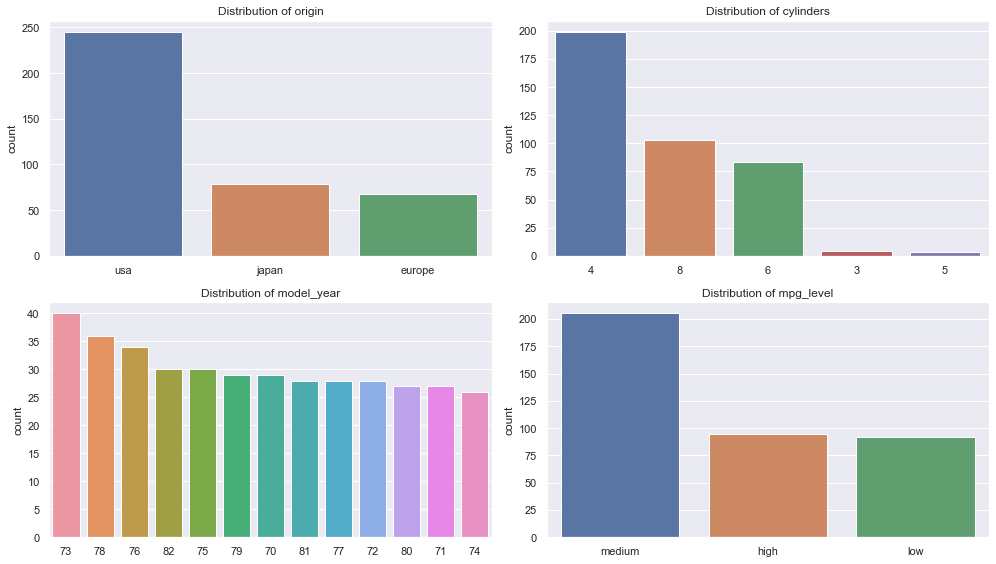

In [31]:
fig = plt.figure(1, (14, 8))

for i, cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [32]:
num_rows, num_cols = df_cat.shape
# calculate the portion of dominant class in each category
for i, cat in enumerate(df_cat.drop(['name'], axis=1).columns):
    val_counts = df_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'{val_counts.index[0]} alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

usa alone contributes to 62.5% of origin
4 alone contributes to 50.77% of cylinders
73 alone contributes to 10.2% of model_year
medium alone contributes to 52.3% of mpg_level


In [33]:
print(f'total unique categories in name {df_cat.name.nunique()}')
print(f'\nunique categories in name {df_cat.name.unique()}')

total unique categories in name 301

unique categories in name ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'plymouth satellite custom'
 'ford torino 500' 'amc matador' 'pontiac catalina brougham'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plym

In [34]:
df_cat['car_company'] = df_cat['name'].apply(lambda x: x.split()[0])
df_cat['car_name'] = df_cat['name'].apply(lambda x: x.split()[1:])

df_cat.drop('name', axis=1, inplace=True)
df_cat.head()

,origin,cylinders,model_year,mpg_level,car_company,car_name
0,usa,8,70,medium,chevrolet,"[chevelle, malibu]"
1,usa,8,70,low,buick,"[skylark, 320]"
2,usa,8,70,medium,plymouth,[satellite]
3,usa,8,70,low,amc,"[rebel, sst]"
4,usa,8,70,medium,ford,[torino]


In [35]:
df_cat['car_name'] = df_cat['car_name'].apply(lambda x: ' '.join(x))

In [36]:
df_cat.head()

,origin,cylinders,model_year,mpg_level,car_company,car_name
0,usa,8,70,medium,chevrolet,chevelle malibu
1,usa,8,70,low,buick,skylark 320
2,usa,8,70,medium,plymouth,satellite
3,usa,8,70,low,amc,rebel sst
4,usa,8,70,medium,ford,torino


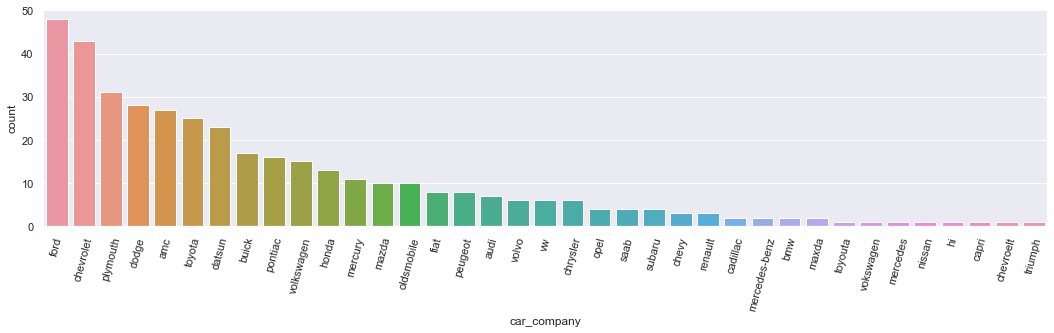

In [38]:
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1, 1, 1)
sns.countplot(df_cat['car_company'], order=df_cat['car_company'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)
plt.show()

In [39]:
df_cat.car_company.value_counts()[:2]

ford         48
chevrolet    43
Name: car_company, dtype: int64

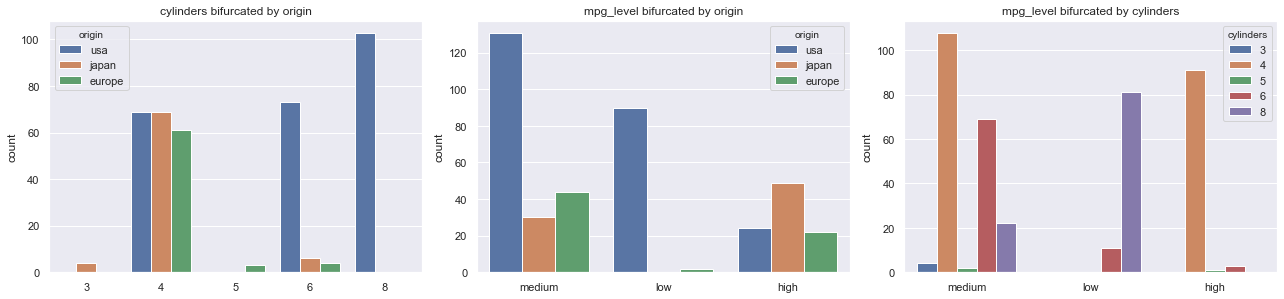

In [42]:
combos = itertools.combinations(['origin', 'cylinders', 'mpg_level'], 2)
fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:
    i += 1
    ax = plt.subplot(2, 3, i)
    sns.countplot(x=pair[1], hue=pair[0], data=df_cat)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} bifurcated by {pair[0]}')
    plt.tight_layout()

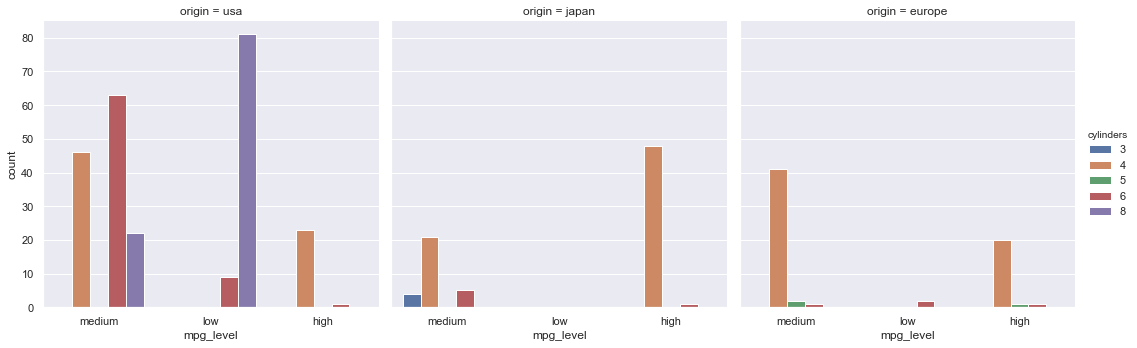

In [44]:
sns.catplot(x='mpg_level', hue='cylinders', col='origin', data=df_cat, kind='count')
plt.show()

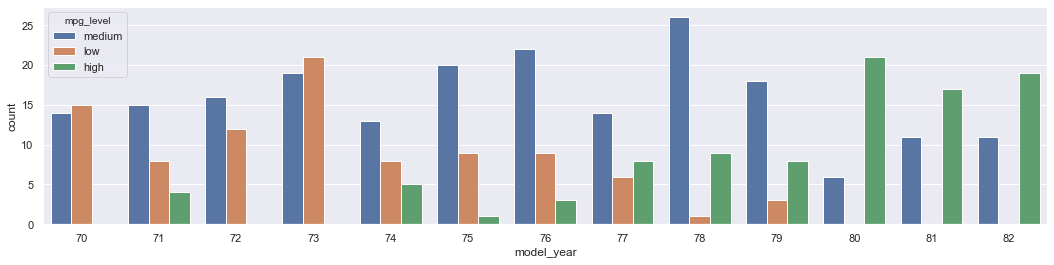

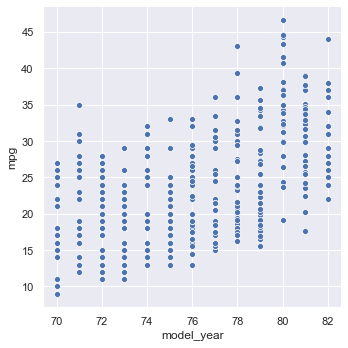

In [46]:
fig = plt.figure(1, (18, 4))
sns.countplot(x='model_year', hue='mpg_level', data=df_cat)
sns.relplot(x='model_year', y='mpg', data=df)
plt.show()

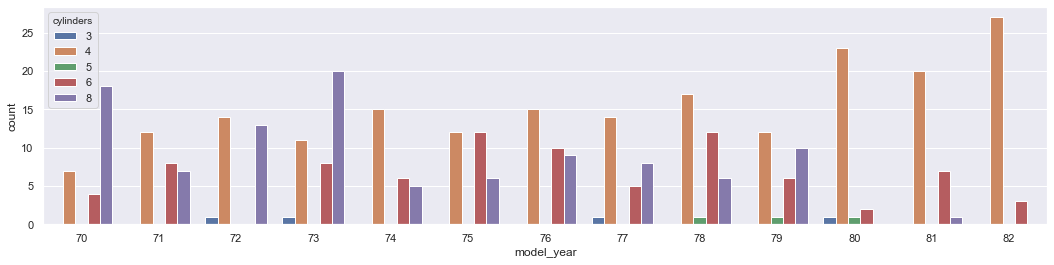

In [49]:
fig = plt.figure(1, (18, 4))
sns.countplot(x='model_year', hue='cylinders', data=df_cat)
plt.show()

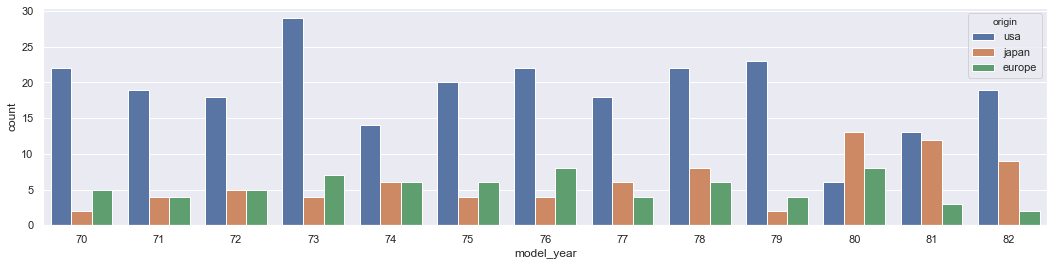

In [50]:
fig = plt.figure(1, (18, 4))
sns.countplot(x='model_year', hue='origin', data=df_cat)
plt.show()